# Title:  Project 7 - Machine Learning with Jupyter and Python
# Author:  James Pinkston
# GitHut Repository:  https://github.com/james-0177/datafun-07-ml
# Due Date:  Oct. 10, 2024
# Purpose:  To show use of Machine Learning (Simple Linear Regression) with Jupyter Notebooks and Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyarrow as pa
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

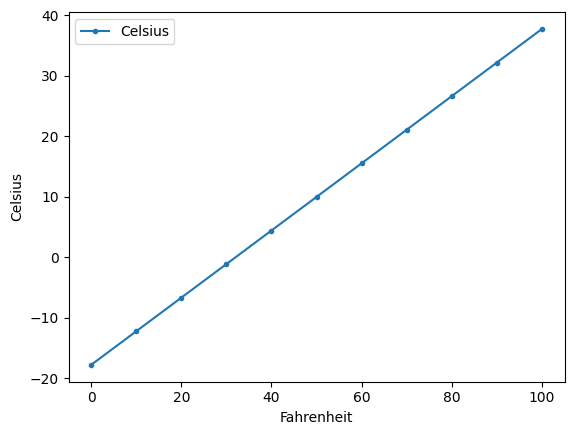

In [2]:
# Declare initial variables

c = lambda f: 5/9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

# Load data into a Pandas dataframe and generate a visualization

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

Part 1 results in the display of a graph of a straight line. Any point along the line can be calculated with the Simple Linear Regression Equation:  *y* = *mx* + *b*.

- *m* is the line's slope
- *b* is the line's intercept with the *y*-axis (at *x* = 0)
- *x* is the independent variable (Fahrenheit)
- *y* is the dependent variable (Celsius)

In simple linear regression, *y* is the *predicted value* for a given *x*.

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [9]:
# Load dataset

nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


## Section 2 - Data Inspection

In [10]:

# Inspect dataframe's head

nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [8]:
# Inspect dataframe's tail

nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [11]:
# Rename the dataframe's columns

nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Inspect the new column names for the first three rows

nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [12]:
# Check the Date series types

nyc_df.Date.dtype

dtype('int64')

In [13]:
# Clean the Date series and inspect

nyc_df.Date = nyc_df.Date.floordiv(100)

nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [15]:
# Calculate basic descriptive statistics for the Date series

pd.set_option('display.precision', 2)

nyc_df.Date.describe()

count     124.00
mean     1956.50
std        35.94
min      1895.00
25%      1925.75
50%      1956.50
75%      1987.25
max      2018.00
Name: Date, dtype: float64

In [16]:
# Calculate basic descriptive statistics for the Temperature series

pd.set_option('display.precision', 2)

nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

In [17]:
# Calculate basic descriptive statistics for the Anomaly series

pd.set_option('display.precision', 2)

nyc_df.Anomaly.describe()

count    124.00
mean       0.20
std        4.54
min      -11.30
25%       -2.82
50%        0.20
75%        3.20
max       10.20
Name: Anomaly, dtype: float64

### Section 5 - Build the Model

In [22]:
# Calculate the slope and intercept for the dataframe

linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

In [23]:
# Display the slope

linear_regression.slope

np.float64(0.014771361132966163)

In [24]:
# Display the intercept

linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict

In [25]:
# Predict the average high temperature for January 2024

linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

### Section 7 - Visualizations

(0.0, 100.0)

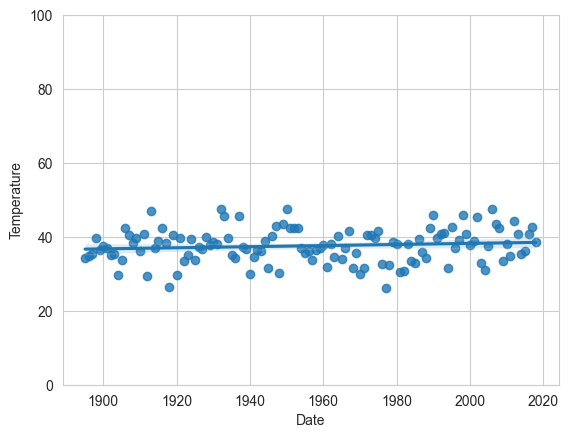

In [32]:
# Generate a scatter plot with a best fit line

sns.set_style('whitegrid')

axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(0, 100)

By scaling the *y*-axis, the linear relationship can be emphasized, as shown above.

(25.0, 50.0)

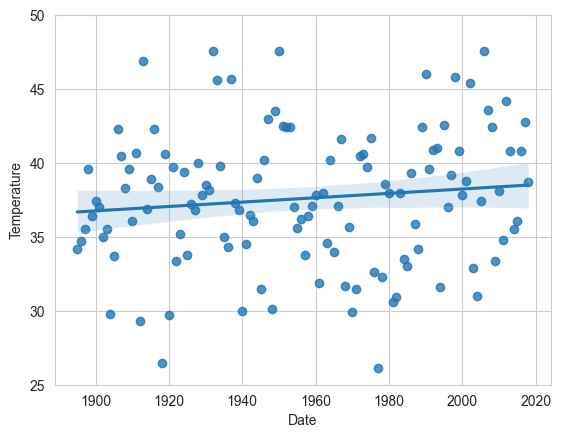

In [33]:
sns.set_style('whitegrid')

axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(25, 50)

The *y*-axis can also be scaled to emphasize the outliers, as shown above.